In [249]:
import tensorflow as tf
import os

In [250]:
import cv2
import imghdr

In [251]:
data_dir = 'data'

In [252]:
os.listdir(data_dir)

['happy', 'sad']

In [253]:
image_exts = ['jpeg','jpg','bmp','png']

In [254]:
for image_class in os.listdir(data_dir): # will check all dir from data_dir example happy and sad
    for image in os.listdir(os.path.join(data_dir, image_class)): # this will check every signle image from each directory
        image_path = os.path.join(data_dir, image_class, image) # joining paths from data_dir -> image_class(happy/sad) -> image(every single image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [255]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [256]:
import numpy as np
from matplotlib import pyplot as plt

In [257]:
# building data pipeline
data =  tf.keras.utils.image_dataset_from_directory('data')

Found 168 files belonging to 2 classes.


In [258]:
# Allowing us to access the data pipeline
data_iterator = data.as_numpy_iterator()

In [259]:
# Accessing the data pipeline // can also get another batch from the iterator
batch = data_iterator.next()

In [260]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [261]:
# Class-1 = Sad people and Class-0 = Happy people
batch[1]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

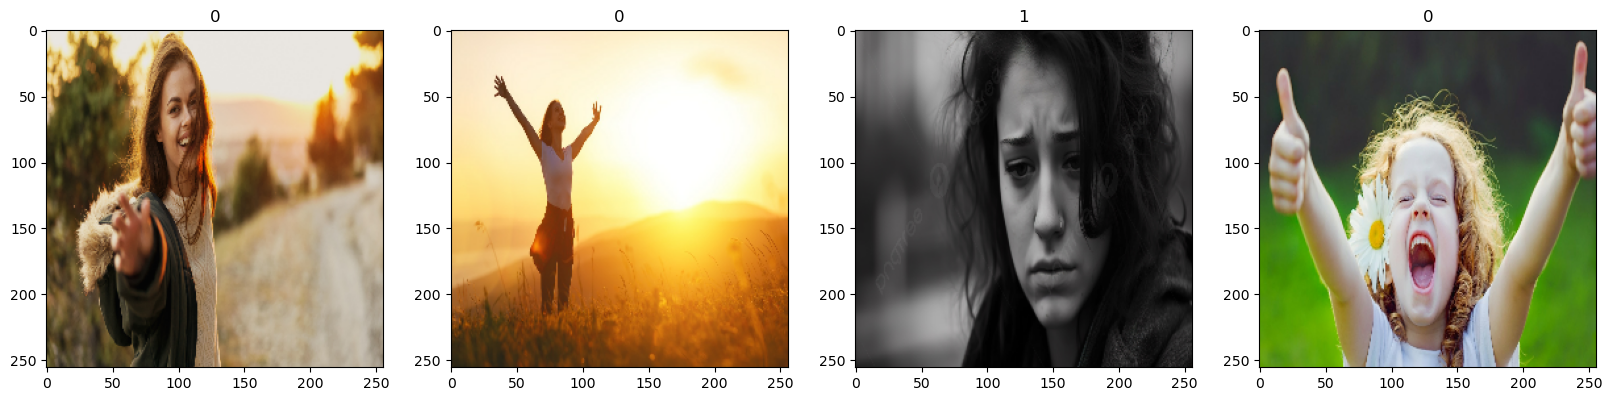

In [262]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [263]:
 scaled = batch[0]/255 # smaller images is better for optimizatioin. batch[0] = images, batch[1] = Labels(happy/sad)(0/1) 

In [264]:
scaled.max()

1.0

PREPROCESSING DATA

In [265]:
data = data.map(lambda x,y: (x/255, y)) # .map provides tranformation in pipeline..... x for images, y for labels 

In [266]:
scaled_iterator = data.as_numpy_iterator()

In [267]:
batch = scaled_iterator.next()

In [268]:
batch[0].max()

1.0

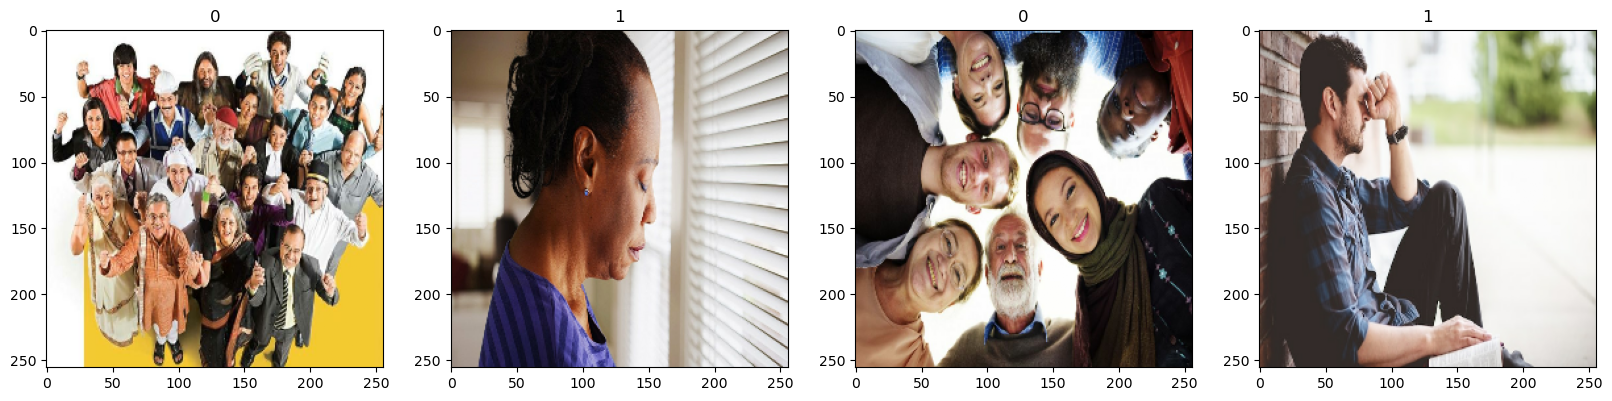

In [269]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) # removed int as it converting decimal to int and converting all image to black
    ax[idx].title.set_text(batch[1][idx])

Spiting the data

In [270]:
len(data)

6

In [271]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [272]:
train_size+test_size+val_size

6

In [273]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

BUILDING DEEP LEARNING MODEL

In [274]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [275]:
model = Sequential() # can also add model layers like Sequential([Conv2D,etc,etc])

In [276]:
# model.add(Conv2D(filters, (pixel size), stride, activation='relu' = changes negative to positive, first_taking_input(shape)))

model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # converting multi dimension to single 

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# sigmoid = mainly shaping model between 0 and 1

In [277]:
# optimizer = adam

model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy']) 

In [278]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [279]:
logdir = 'logs'

In [280]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [281]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# epochs = one run over entire datasets

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 562ms/step - accuracy: 0.5813 - loss: 0.9277 - val_accuracy: 0.5625 - val_loss: 0.6866
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 523ms/step - accuracy: 0.4958 - loss: 0.7020 - val_accuracy: 0.8125 - val_loss: 0.6643
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 526ms/step - accuracy: 0.6969 - loss: 0.6510 - val_accuracy: 0.4375 - val_loss: 0.7243
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 0.6833 - loss: 0.6053 - val_accuracy: 0.8750 - val_loss: 0.5489
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 524ms/step - accuracy: 0.7990 - loss: 0.5476 - val_accuracy: 0.6250 - val_loss: 0.6366
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 535ms/step - accuracy: 0.7750 - loss: 0.4579 - val_accuracy: 0.8438 - val_loss: 0.4268
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - accuracy: 0.8667 - loss: 0.3519 - val_accuracy: 0.8750 - val_loss: 0.3092
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - accuracy: 0.9354 - loss: 0.2596 - val_accuracy: 0.9062 - val_loss:

In [282]:
hist

Plot Performance

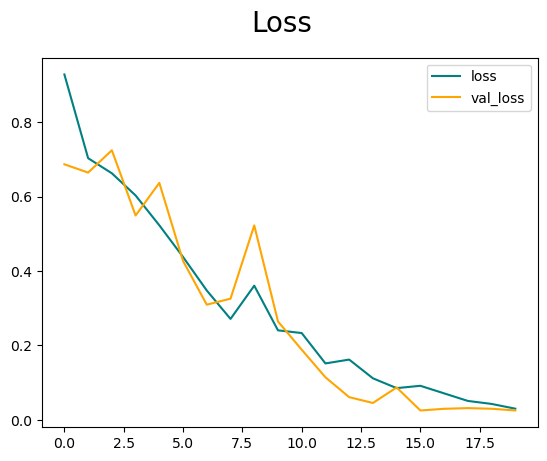

In [283]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

# Evaluate Performance

In [284]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [285]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [286]:
len(test)

1

In [287]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [288]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


TEST

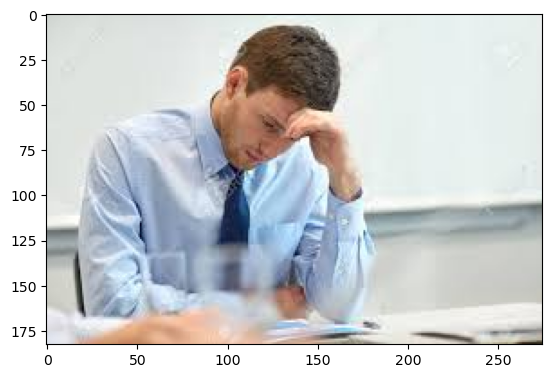

In [294]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

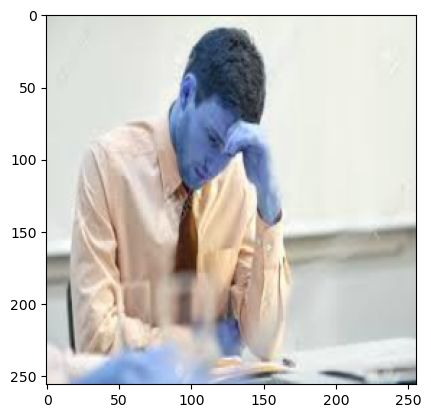

In [295]:
resize = tf.image.resize(img, (256,256 ))
plt.imshow(resize.numpy().astype(int))
plt.show

In [296]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [297]:
yhat

array([[0.752403]], dtype=float32)

In [298]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


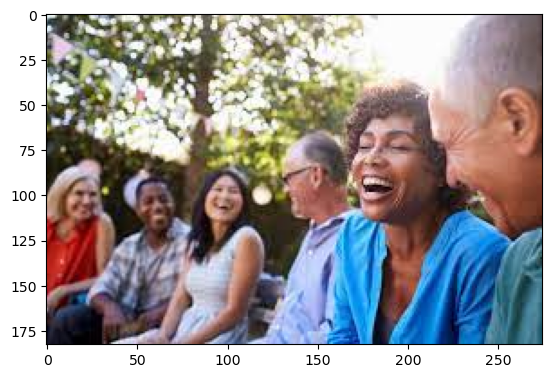

In [299]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

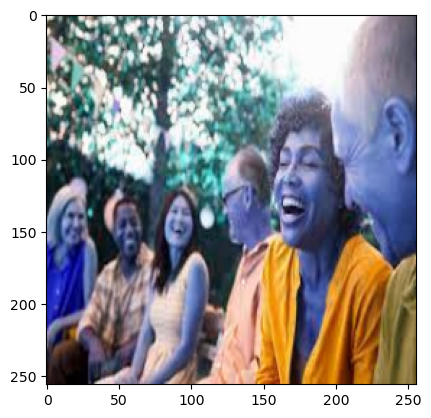

In [300]:
resize = tf.image.resize(img, (256,256 ))
plt.imshow(resize.numpy().astype(int))
plt.show

In [301]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # as our works on batch of images, we put single image in multi-dimension........

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [302]:
yhat

array([[0.02240047]], dtype=float32)

In [303]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# Saving Model

In [304]:
from keras.models import load_model

In [305]:
model.save(os.path.join('models','EmotionModel.h5'))

In [306]:
os.path.join('models', 'EmotionModel.h5')

'models\\EmotionModel.h5'

In [307]:
new_model = load_model(os.path.join('models','EmotionModel.h5'))

In [308]:
new_model

<Sequential name=sequential_9, built=True>

In [310]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [311]:
if yhat_new > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# :)